In [2]:
import os
import datetime
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

def get_current_time(format=None):
    """Gets the current time in Python and optionally formats it.

    Args:
        format (str, optional): The desired format for the time string.
            Defaults to None, which returns the time in ISO 8601 format (YYYY-MM-DD HH:MM:SS).
            Common format codes include:
                - %Y: Year (e.g., 2024)
                - %m: Month (e.g., 02)
                - %d: Day of the month (e.g., 27)
                - %H: Hour in 24-hour format (e.g., 16)
                - %M: Minute (e.g., 58)
                - %S: Second (e.g., 24)
                - %f: Microseconds (e.g., 406569)

    Returns:
        str: The formatted current time string.
    """

    current_time = datetime.datetime.now()

    if format:
        return current_time.strftime(format)
    else:
        return current_time.isoformat()

current_time = get_current_time("%d-%m-%y_%H=%M=%S")
    
def remove_file(filename):
    if os.path.exists(filename):
        os.remove(filename)


In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
origin_test_data = test_data

In [4]:
train_data.head()

id  CustomerId         Surname  ...  IsActiveMember EstimatedSalary Exited
0   0    15674932  Okwudilichukwu  ...             0.0       181449.97      0
1   1    15749177   Okwudiliolisa  ...             1.0        49503.50      0
2   2    15694510           Hsueh  ...             0.0       184866.69      0
3   3    15741417             Kao  ...             1.0        84560.88      0
4   4    15766172       Chiemenam  ...             1.0        15068.83      0

[5 rows x 14 columns]

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
train_data.describe()

id    CustomerId  ...  EstimatedSalary         Exited
count  165034.0000  1.650340e+05  ...    165034.000000  165034.000000
mean    82516.5000  1.569201e+07  ...    112574.822734       0.211599
std     47641.3565  7.139782e+04  ...     50292.865585       0.408443
min         0.0000  1.556570e+07  ...        11.580000       0.000000
25%     41258.2500  1.563314e+07  ...     74637.570000       0.000000
50%     82516.5000  1.569017e+07  ...    117948.000000       0.000000
75%    123774.7500  1.575682e+07  ...    155152.467500       0.000000
max    165033.0000  1.581569e+07  ...    199992.480000       1.000000

[8 rows x 11 columns]

In [7]:
# Change based on what the problem is
dropped_columns = ['id', 'CustomerId', 'Surname']
target_column = 'Exited'

categorical_features = train_data.drop(columns=dropped_columns + [target_column]).select_dtypes(include=['object']).columns.tolist()
numerical_features = train_data.drop(columns=dropped_columns + [target_column]).select_dtypes(exclude=['object']).columns.tolist()

train_data = train_data.drop(columns=dropped_columns)
test_data = test_data.drop(columns=dropped_columns)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [9]:
train_data=pd.get_dummies(data=train_data,drop_first=True)
test_data=pd.get_dummies(data=test_data,drop_first=True)

In [10]:
train_data

CreditScore   Age  ...  Geography_Spain  Gender_Male
0               668  33.0  ...            False         True
1               627  33.0  ...            False         True
2               678  40.0  ...            False         True
3               581  34.0  ...            False         True
4               716  33.0  ...             True         True
...             ...   ...  ...              ...          ...
165029          667  33.0  ...             True        False
165030          792  35.0  ...            False         True
165031          565  31.0  ...            False         True
165032          554  30.0  ...             True        False
165033          850  31.0  ...            False         True

[165034 rows x 12 columns]

In [11]:
test_data

CreditScore   Age  ...  Geography_Spain  Gender_Male
0               586  23.0  ...            False        False
1               683  46.0  ...            False        False
2               656  34.0  ...            False        False
3               681  36.0  ...            False         True
4               752  38.0  ...            False         True
...             ...   ...  ...              ...          ...
110018          570  29.0  ...             True         True
110019          575  36.0  ...            False        False
110020          712  31.0  ...            False         True
110021          709  32.0  ...            False        False
110022          621  37.0  ...            False        False

[110023 rows x 11 columns]

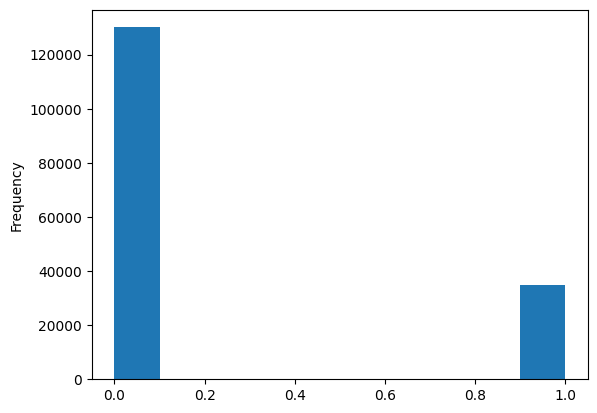

In [12]:
train_data.Exited.plot.hist()
plt.show()

In [13]:
train_data_wo_target = train_data.drop(columns=[target_column])

<Axes: title={'center': 'Correlated with Exited Column'}>

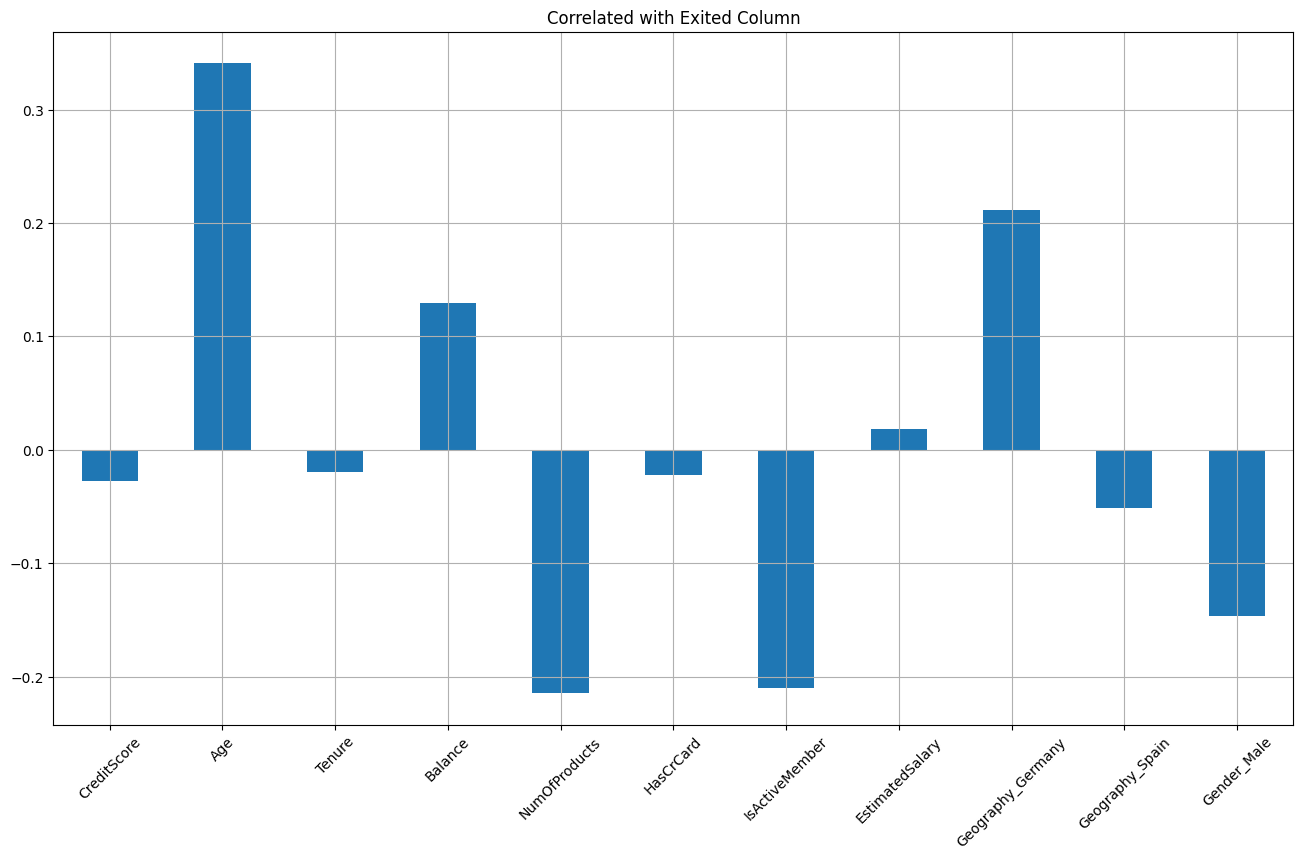

In [14]:
train_data_wo_target.corrwith(train_data[target_column]).plot.bar(figsize=(16,9), title=f'Correlated with {target_column} Column', rot=45,grid=True)

<Axes: >

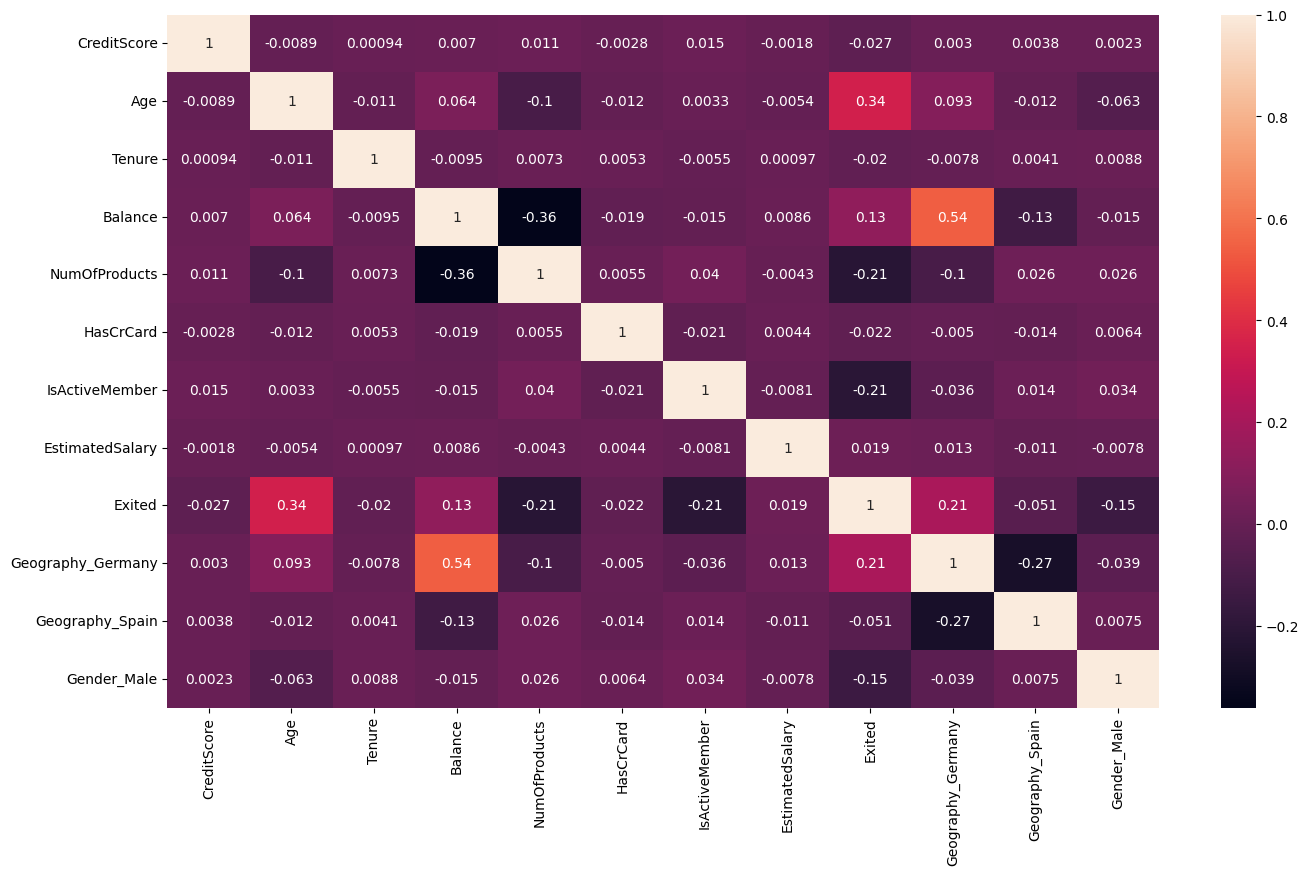

In [15]:
corr = train_data.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

In [16]:
x_train = train_data.drop(columns=[target_column])
y_train = train_data[target_column]
x_test = test_data

In [17]:
x_train

CreditScore   Age  ...  Geography_Spain  Gender_Male
0               668  33.0  ...            False         True
1               627  33.0  ...            False         True
2               678  40.0  ...            False         True
3               581  34.0  ...            False         True
4               716  33.0  ...             True         True
...             ...   ...  ...              ...          ...
165029          667  33.0  ...             True        False
165030          792  35.0  ...            False         True
165031          565  31.0  ...            False         True
165032          554  30.0  ...             True        False
165033          850  31.0  ...            False         True

[165034 rows x 11 columns]

In [18]:
test_data

CreditScore   Age  ...  Geography_Spain  Gender_Male
0               586  23.0  ...            False        False
1               683  46.0  ...            False        False
2               656  34.0  ...            False        False
3               681  36.0  ...            False         True
4               752  38.0  ...            False         True
...             ...   ...  ...              ...          ...
110018          570  29.0  ...             True         True
110019          575  36.0  ...            False        False
110020          712  31.0  ...            False         True
110021          709  32.0  ...            False        False
110022          621  37.0  ...            False        False

[110023 rows x 11 columns]

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [20]:
train_df = pd.DataFrame(x_train)
train_df.columns = train_data.drop(columns=[target_column]).columns
train_df.head()


CreditScore       Age  ...  Geography_Spain  Gender_Male
0     0.144135 -0.578074  ...        -0.530199     0.878465
1    -0.367706 -0.578074  ...        -0.530199     0.878465
2     0.268974  0.211354  ...        -0.530199     0.878465
3    -0.941966 -0.465299  ...        -0.530199     0.878465
4     0.743362 -0.578074  ...         1.886084     0.878465

[5 rows x 11 columns]

In [21]:
smote = SMOTE(
    sampling_strategy='auto',
    random_state=0
    )
x_train, y_train = smote.fit_resample(x_train, y_train)

In [116]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=100).fit(x_train, y_train)
y_predictions = model.predict_proba(x_test)
predictions_probabilities = y_predictions[:, 1]
rounded_probabilities = [round(prob, 1) for prob in predictions_probabilities]
ids = origin_test_data['id']
output_df = pd.DataFrame({'id': ids, 'Exited': rounded_probabilities})
output_csv_name = f"predictions_RF_{current_time}.csv"
output_df.to_csv(output_csv_name, index=False)

# Algoritma untuk output data yang dipakai untuk melatih model
clean_data_df = pd.DataFrame(x_train)
clean_data_df.columns = train_data.drop(columns=[target_column]).columns
clean_data_csv_name = f"clean_data_RF_{current_time}.csv"
clean_data_df.to_csv(clean_data_csv_name, index=False)

# Algoritma untuk output dokumentasi seperti permasalahan yang diselesaikan, waktu run code, dll.
documentation_txt_name = f"documentation_RF_{current_time}.txt"
current_ipynb_file = "BCDv2.ipynb"
string_to_write = ""
with open(documentation_txt_name, "w") as f:
    # Write your documentation content to the file
    string_to_write += f"Problem to solve\t\t: {os.path.basename(os.getcwd())}\n"
    string_to_write += f"Date and Time file created\t: {get_current_time()}\n"
    string_to_write += f"Algorithm title\t\t\t: Random Forest\n\n"
    string_to_write += f"Training data info:\n{train_data.dtypes}\n\n"
    string_to_write += f"Test data info:\n{test_data.dtypes}\n\n"
    string_to_write += f"Categorical Features\t: {categorical_features}\n"
    string_to_write += f"Numerical Features\t: {numerical_features}\n\n"
    string_to_write += f"For more data details see {clean_data_csv_name} (data that are beeing trained)\n"
    string_to_write += f"For data preprocessing details see {current_ipynb_file} or self\n"
    f.write(string_to_write)

with zipfile.ZipFile(f"complete_data_RF_{current_time}.zip", "w") as zip_file:
    # Add the current code into the zip
    zip_file.write(current_ipynb_file, arcname=current_ipynb_file)
    # Add the CSV file
    zip_file.write(output_csv_name, arcname=output_csv_name)  # Specify archive name for the CSV
    zip_file.write(clean_data_csv_name, arcname=clean_data_csv_name)  # Specify archive name for the CSV
    # Add the text file
    zip_file.write(documentation_txt_name, arcname=documentation_txt_name)  # Specify archive name for the text file
    remove_file(clean_data_csv_name)
    remove_file(documentation_txt_name)


In [63]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=100, learning_rate=0.15).fit(x_train, y_train)
y_predictions = model.predict_proba(x_test)
predictions_probabilities = y_predictions[:, 1]
rounded_probabilities = [round(prob, 1) for prob in predictions_probabilities]
ids = origin_test_data['id']
output_df = pd.DataFrame({'id': ids, 'Exited': rounded_probabilities})
output_csv_name = f"predictions_GB_{current_time}.csv"
output_df.to_csv(output_csv_name, index=False)

# Algoritma untuk output data yang dipakai untuk melatih model
clean_data_df = pd.DataFrame(x_train)
clean_data_df.columns = train_data.drop(columns=[target_column]).columns
clean_data_csv_name = f"clean_data_GB_{current_time}.csv"
clean_data_df.to_csv(clean_data_csv_name, index=False)

# Algoritma untuk output dokumentasi seperti permasalahan yang diselesaikan, waktu run code, dll.
documentation_txt_name = f"documentation_GB_{current_time}.txt"
current_ipynb_file = "BCDv2.ipynb"
string_to_write = ""
with open(documentation_txt_name, "w") as f:
    # Write your documentation content to the file
    string_to_write += f"Problem to solve\t\t: {os.path.basename(os.getcwd())}\n"
    string_to_write += f"Date and Time file created\t: {get_current_time()}\n"
    string_to_write += f"Algorithm title\t\t\t: Gradient Boosting\n\n"
    string_to_write += f"Training data info:\n{train_data.dtypes}\n\n"
    string_to_write += f"Test data info:\n{test_data.dtypes}\n\n"
    string_to_write += f"Categorical Features\t: {categorical_features}\n"
    string_to_write += f"Numerical Features\t: {numerical_features}\n\n"
    string_to_write += f"For more data details see {clean_data_csv_name} (data that are beeing trained)\n"
    string_to_write += f"For data preprocessing details see {current_ipynb_file} or self\n"
    f.write(string_to_write)

with zipfile.ZipFile(f"complete_data_GB_{current_time}.zip", "w") as zip_file:
    # Add the current code into the zip
    zip_file.write(current_ipynb_file, arcname=current_ipynb_file)
    # Add the CSV file
    zip_file.write(output_csv_name, arcname=output_csv_name)  # Specify archive name for the CSV
    zip_file.write(clean_data_csv_name, arcname=clean_data_csv_name)  # Specify archive name for the CSV
    # Add the text file
    zip_file.write(documentation_txt_name, arcname=documentation_txt_name)  # Specify archive name for the text file
    remove_file(clean_data_csv_name)
    remove_file(documentation_txt_name)

In [24]:
from xgboost import XGBClassifier
model_params = {
    "objective": "binary:logistic", 
    "n_estimators": 100,  
    "learning_rate": 0.1,  
    "max_depth": 5
}

model = XGBClassifier(**model_params)
model.fit(x_train, y_train)
y_probability = model.predict_proba(x_test)[:, 1]
rounded_probabilities = [round(prob, 1) for prob in y_probability]
ids = origin_test_data['id']
output_df = pd.DataFrame({'id': ids, 'Exited': rounded_probabilities})
output_csv_name = f"predictions_XGB_{current_time}.csv"
output_df.to_csv(output_csv_name, index=False)

clean_data_df = pd.DataFrame(x_train)
clean_data_df.columns = train_data.drop(columns=[target_column]).columns
clean_data_csv_name = f"clean_data_XGB_{current_time}.csv"
clean_data_df.to_csv(clean_data_csv_name, index=False)

# Algoritma untuk output dokumentasi seperti permasalahan yang diselesaikan, waktu run code, dll.
documentation_txt_name = f"documentation_XGB_{current_time}.txt"
current_ipynb_file = "BCDv2.ipynb"
string_to_write = ""
with open(documentation_txt_name, "w") as f:
    # Write your documentation content to the file
    string_to_write += f"Problem to solve\t\t: {os.path.basename(os.getcwd())}\n"
    string_to_write += f"Date and Time file created\t: {get_current_time()}\n"
    string_to_write += f"Algorithm title\t\t\t: XG Boost\n\n"
    string_to_write += f"Training data info:\n{train_data.dtypes}\n\n"
    string_to_write += f"Test data info:\n{test_data.dtypes}\n\n"
    string_to_write += f"Categorical Features\t: {categorical_features}\n"
    string_to_write += f"Numerical Features\t: {numerical_features}\n\n"
    string_to_write += f"For more data details see {clean_data_csv_name} (data that are beeing trained)\n"
    string_to_write += f"For data preprocessing details see {current_ipynb_file} or self\n"
    f.write(string_to_write)

with zipfile.ZipFile(f"complete_data_XGB_{current_time}.zip", "w") as zip_file:
    # Add the current code into the zip
    zip_file.write(current_ipynb_file, arcname=current_ipynb_file)
    # Add the CSV file
    zip_file.write(output_csv_name, arcname=output_csv_name)  # Specify archive name for the CSV
    zip_file.write(clean_data_csv_name, arcname=clean_data_csv_name)  # Specify archive name for the CSV
    # Add the text file
    zip_file.write(documentation_txt_name, arcname=documentation_txt_name)  # Specify archive name for the text file
    remove_file(clean_data_csv_name)
    remove_file(documentation_txt_name)
